In [9]:
#Importing libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import keras
import os

In [10]:
#Setting directory
os.chdir('C:\\Data\github\\neural_networks\\Artificial neural networks (ANN)')

In [11]:
#Loading data
df = pd.read_csv('sample_input.csv')

In [12]:
df.head()

,hcp_id,hcp_specialty,t1_diag_pat,t1_treated_pat,total_unique_pat_treated,unique_cancer_treated,t1_nps,t1_platinum_pat,t1_platinum_pat_1L,comp_a_claims,...,Display- eNewsletters_Sent,In App_Impressions,In-office Video/ Wallboards_Deli,Email_Delivered_EM,Direct Mail_Delivered_DM,Display- Targeted/Programmatic_I,Text Ad_Clicks,admisson_impressions,print_exposure,ABC_t1_nps
0,1,Oncology,601,160,169,5,27,62,34,239,...,0,0,0,0,1,1,0,10,0.000000,0
1,2,Others,236,137,143,5,2,49,27,99,...,0,0,0,0,0,0,0,0,0.000000,0
2,3,Oncology,438,132,147,6,35,50,29,162,...,0,0,0,4,1,0,0,0,0.000000,0
3,4,Oncology,328,130,145,8,12,40,22,78,...,0,0,0,0,1,0,1,32,0.119521,1
4,5,Oncology,555,112,120,6,22,19,9,410,...,0,0,0,3,1,0,0,7,0.000000,0


In [13]:
#Dropping HCP ID
df = df.drop(['hcp_id'],axis = 1)

In [14]:
#Encoding specialty
df = pd.get_dummies(df,drop_first=True)

In [15]:
#Separating features and dependent variable
df = df.values
X = df[:,0:29]
Y = df[:,29]

In [16]:
X

array([[6.01000000e+02, 1.60000000e+02, 1.69000000e+02, ...,
        0.00000000e+00, 1.00000000e+01, 0.00000000e+00],
       [2.36000000e+02, 1.37000000e+02, 1.43000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.38000000e+02, 1.32000000e+02, 1.47000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 2.10000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 1.00000000e+00, 2.77000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.19489724e-01],
       [2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [17]:
#Encoder for Y
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [23]:
#Keras - Neural Network portion
#Adding dense layers, various activation functions, regularizers, drop outs, multiple metrics, validation split etc.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(16, input_dim=29, activation='relu'))
model.add(Dense(8, activation='relu',kernel_regularizer = (regularizers.l1_l2(l1=0.01,l2=0.01))))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Precision','Recall'])
#model.optimizer.lr = 0.01

nn = model.fit(X, Y, epochs=150, batch_size=50)
#nn = model.fit(X, Y, epochs=150, batch_size=50, validation_split= 0.2)

Epoch 1/150
293/293 [==============================] - 1s 724us/step - loss: 1.5997 - precision: 0.0785 - recall: 0.3102
Epoch 2/150
293/293 [==============================] - 0s 717us/step - loss: 0.6667 - precision: 0.1020 - recall: 0.0161
Epoch 3/150
293/293 [==============================] - 0s 736us/step - loss: 0.4603 - precision: 0.2118 - recall: 0.0174
Epoch 4/150
293/293 [==============================] - 0s 690us/step - loss: 0.3586 - precision: 0.3082 - recall: 0.0111
Epoch 5/150
293/293 [==============================] - 0s 743us/step - loss: 0.3164 - precision: 0.2988 - recall: 0.0187
Epoch 6/150
293/293 [==============================] - 0s 730us/step - loss: 0.2813 - precision: 0.4703 - recall: 0.0144
Epoch 7/150
293/293 [==============================] - 0s 715us/step - loss: 0.2638 - precision: 0.3408 - recall: 0.0017
Epoch 8/150
293/293 [==============================] - 0s 746us/step - loss: 0.2371 - precision: 0.4818 - recall: 0.0173
Epoch 9/150
293/293 [===========

293/293 [==============================] - 0s 699us/step - loss: 0.1664 - precision: 0.5966 - recall: 0.0668
Epoch 69/150
293/293 [==============================] - 0s 770us/step - loss: 0.1640 - precision: 0.5739 - recall: 0.0872
Epoch 70/150
293/293 [==============================] - 0s 740us/step - loss: 0.1630 - precision: 0.5224 - recall: 0.0827
Epoch 71/150
293/293 [==============================] - 0s 765us/step - loss: 0.1612 - precision: 0.6635 - recall: 0.1085
Epoch 72/150
293/293 [==============================] - 0s 736us/step - loss: 0.1687 - precision: 0.5245 - recall: 0.0553
Epoch 73/150
293/293 [==============================] - 0s 749us/step - loss: 0.1767 - precision: 0.6211 - recall: 0.0789
Epoch 74/150
293/293 [==============================] - 0s 750us/step - loss: 0.1691 - precision: 0.5983 - recall: 0.1322
Epoch 75/150
293/293 [==============================] - 0s 741us/step - loss: 0.1709 - precision: 0.5682 - recall: 0.0738
Epoch 76/150
293/293 [===============

293/293 [==============================] - 0s 688us/step - loss: 0.1702 - precision: 0.6301 - recall: 0.1142
Epoch 135/150
293/293 [==============================] - 0s 743us/step - loss: 0.1706 - precision: 0.5596 - recall: 0.0922
Epoch 136/150
293/293 [==============================] - 0s 742us/step - loss: 0.1679 - precision: 0.5151 - recall: 0.0820
Epoch 137/150
293/293 [==============================] - 0s 684us/step - loss: 0.1705 - precision: 0.5117 - recall: 0.0792
Epoch 138/150
293/293 [==============================] - 0s 797us/step - loss: 0.1711 - precision: 0.5710 - recall: 0.1230
Epoch 139/150
293/293 [==============================] - 0s 737us/step - loss: 0.1631 - precision: 0.6264 - recall: 0.0809
Epoch 140/150
293/293 [==============================] - 0s 701us/step - loss: 0.1628 - precision: 0.6520 - recall: 0.1369
Epoch 141/150
293/293 [==============================] - 0s 731us/step - loss: 0.1619 - precision: 0.5662 - recall: 0.0984
Epoch 142/150
293/293 [=======

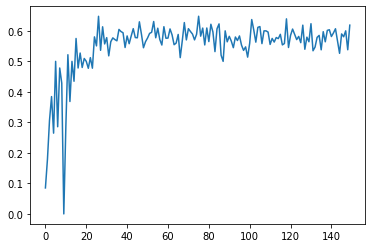

In [24]:
#Checking how the precision improved over epochs
plt.plot(nn.history['precision'])
plt.show()